In [1]:
%pylab inline

import pickle
import gzip
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from itertools import combinations
from collections import Counter
import networkx as nx
from datetime import datetime

In [10]:
import graph_tool as gt
from graph_tool.clustering import global_clustering, local_clustering
from graph_tool.correlations import assortativity

# Does the plot of the collective dynamics for the dataset for which we have data

- assortativity: k_nn vs k
- clustering assortativity: c_k vs k
- w_ij vs (k_i * k_j)

Run the 
```
mpirun -n 12 -hostfile MPIhostFile python2 06_collectiveMeasuresScript_MPI.py TWT
```

For each data and then continue here...

In [5]:
#whatToCompare = ["TWT", "URNS_TWT"]
whatToCompare = ["APS", "URNS_APS"]
#whatToCompare = ["URNS_APS"]
#whatToCompare = ["APS"]
#whatToCompare = ["MPC", "URNS_MPC"]
whatToCompare = ["URNS_APS", "APS_samples"]

resultsArra = [pickle.load(gzip.open("collectiveResults_%s.pkl.gz"
                                     % selection, "rb"))
              for selection in whatToCompare]

figureNameSuffix = "-".join(whatToCompare)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in greater


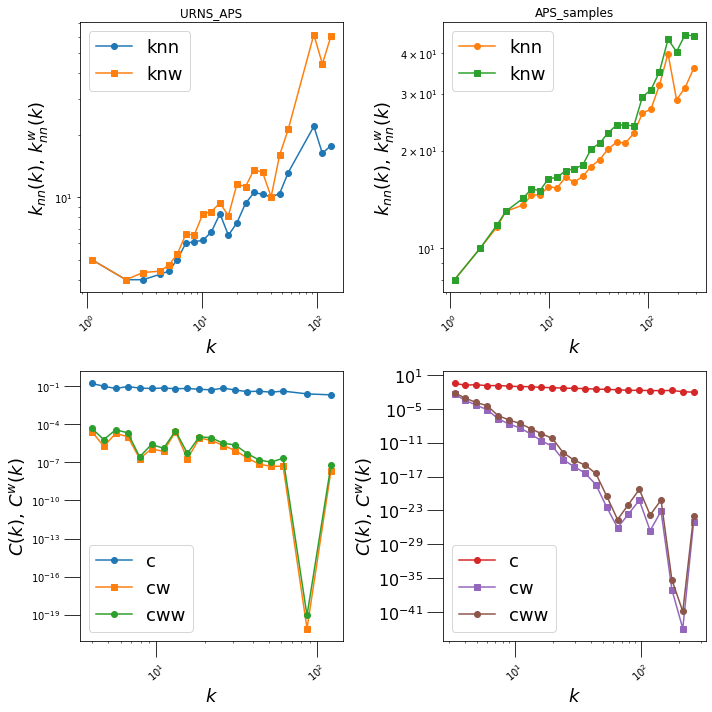

In [6]:
# Average overlap per cumulative weight percentile
fig, axs = plt.subplots(2,2,figsize=(10,10))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    #tmp_kkk, tmp_ccc, tmp_ccw, tmp_cww, tmp_knn, tmp_knw =\
    #                        [], [], [], [], [], []
    #for node in tmp_res["nodeDegree"].iterkeys():
    #    tmp_kkk.append(tmp_res["nodeDegree"][node])
    #    tmp_ccc.append(tmp_res["nodeClust"][node])
    #    tmp_ccw.append(tmp_res["nodeWClust"][node])
    #    tmp_cww.append(tmp_res["nodeWWWClust"][node])
    #    tmp_knn.append(tmp_res["nodeNNdeg"][node])
    #    tmp_knw.append(tmp_res["nodeNWdeg"][node])
    
    tmp_kkk = np.array(tmp_res["nodeDegree"])
    tmp_ccc = np.array(tmp_res["nodeClust"])
    tmp_ccw = np.array(tmp_res["nodeWClust"])
    tmp_cww = np.array(tmp_res["nodeWWWClust"])
    tmp_knn = np.array(tmp_res["nodeNNdeg"])
    tmp_knw = np.array(tmp_res["nodeNWdeg"])
    
    bins = np.logspace(np.log10(tmp_kkk.min()),
                    np.log10(tmp_kkk.max()),30)
    
    yknn = np.array([np.median(tmp_knn[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    yknw = np.array([np.median(tmp_knw[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    
    bins = (bins[1:] + bins[:-1])/2.
    
    ax = axs[0][iii]
    ax.set_title(tmp_res["name"])
    ax.loglog(bins[yknn>0], yknn[yknn>0], "o-C%d"%iii, label="knn")
    ax.loglog(bins[yknw>0], yknw[yknw>0], "s-C%d"%(iii+1), label="knw")
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    plt.yticks(size=16)

    ax.set_xlabel(r"$k$", size=18)
    ax.set_ylabel(r"$k_{nn}(k),\,k_{nn}^w(k)$", size=18)
    
    yccc = np.array([np.median(tmp_ccc[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    yccw = np.array([np.median(tmp_ccw[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    ycww = np.array([np.median(tmp_cww[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    
    bins = (bins[1:] + bins[:-1])/2.
    ax = axs[1][iii]
    ax.loglog(bins[yccc>0], yccc[yccc>0], "o-C%d"%(iii*3), label="c")
    ax.loglog(bins[yccw>0], yccw[yccw>0], "s-C%d"%(iii*3+1), label="cw")
    ax.loglog(bins[ycww>0], ycww[ycww>0], "o-C%d"%(iii*3+2), label="cww")
    #ax.loglog(bins[2:], ycww[2:], "^-C%d"%iii, label="cww")
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    ax.yaxis.set_tick_params(size=16)

    ax.set_xlabel(r"$k$", size=18)
    ax.set_ylabel(r"$C(k),\,C^w(k)$", size=18)
plt.tight_layout()
plt.savefig("collective1_%s.pdf" % figureNameSuffix, bbox_inches="tight")

In [7]:
#"A": 1195772445 -> 1199141999  "1": 1167606000, "9": 1195772445

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


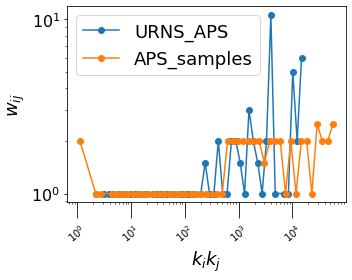

In [8]:
# 
fig, axs = plt.subplots(1,1,figsize=(5,4))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_kikj, tmp_wwww = [], []
    for edge, vals in tmp_res["edgesStats"].items():
        tmp_kikj.append(vals["ki_kj"])
        tmp_wwww.append(vals["e_str"])
        
    tmp_wwww = np.array(tmp_wwww)
    tmp_kikj = np.array(tmp_kikj)
    
    bins = np.logspace(np.log10(tmp_kikj.min()),
                    np.log10(tmp_kikj.max()),50)
    
    ywww = np.array([np.median(tmp_wwww[
            np.logical_and(tmp_kikj>=bins[i], tmp_kikj<bins[i+1])])
                   for i in range(len(bins)-1)])
    
    bins = (bins[1:] + bins[:-1])/2.
    ax = axs
    ax.loglog(bins[ywww>0], ywww[ywww>0], "o-C%d"%iii, label=tmp_res["name"])
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$k_ik_j$", size=18)
    plt.ylabel(r"$w_{ij}$", size=18)
    
plt.tight_layout()
plt.savefig("collective2_%s.pdf" % figureNameSuffix, bbox_inches="tight")

In [9]:
#resultsArra[0]["edgesStats"]

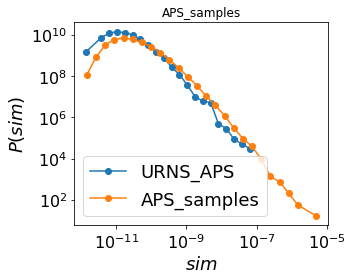

In [10]:
# 
fig, axs = plt.subplots(1,1,figsize=(5,4))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    #if iii <= 0: continue
    tmp_sim = np.array([e["sim"] for k, e in tmp_res["edgesStats"].items()])
    
    bins = np.logspace(np.log10(max(1e-18, tmp_sim.min())),
                    np.log10(tmp_sim.max()),50)
    
    ysim, bins = np.histogram(tmp_sim, bins=bins, density=True)
    
    bins = (bins[1:] + bins[:-1])/2.
    bins = bins[ysim > 0]
    ysim = ysim[ysim > 0]
    
    ax = axs
    ax.set_title(tmp_res["name"])
    ax.loglog(bins, ysim, "o-C%d"%iii, label=tmp_res["name"])
    
    ax.legend(loc="best", fontsize=18)
    #ax.xaxis.set_tick_params(size=16, rotation=40)
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$sim$", size=18)
    plt.ylabel(r"$P(sim)$", size=18)
    
plt.tight_layout()
plt.savefig("collective3_%s.pdf" % figureNameSuffix, bbox_inches="tight")

# APS urns

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

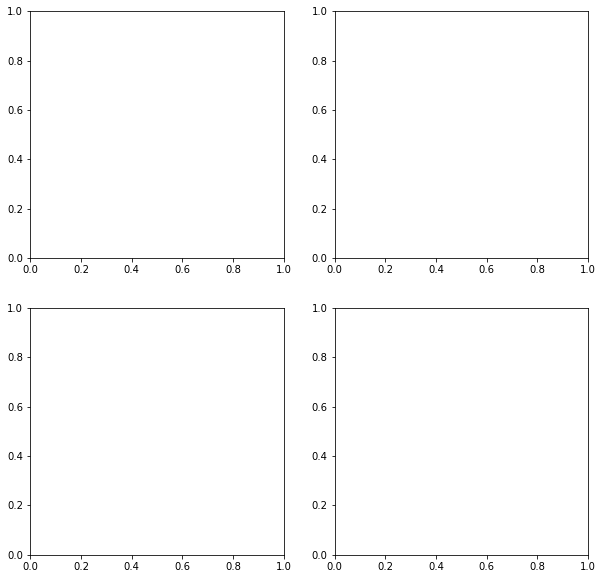

In [11]:
# Average overlap per cumulative weight percentile
fig, axs = plt.subplots(2,2,figsize=(10,10))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_kkk, tmp_ccc, tmp_ccw, tmp_cww, tmp_knn, tmp_knw =\
                            [], [], [], [], [], []
    for node in tmp_res["nodeDegree"].keys():
        tmp_kkk.append(tmp_res["nodeDegree"][node])
        tmp_ccc.append(tmp_res["nodeClust"][node])
        tmp_ccw.append(tmp_res["nodeWClust"][node])
        tmp_cww.append(tmp_res["nodeWWWClust"][node])
        tmp_knn.append(tmp_res["nodeNNdeg"][node])
        tmp_knw.append(tmp_res["nodeNWdeg"][node])
    
    tmp_kkk = np.array(tmp_kkk)
    tmp_ccc = np.array(tmp_ccc)
    tmp_ccw = np.array(tmp_ccw)
    tmp_cww = np.array(tmp_cww)
    tmp_knn = np.array(tmp_knn)
    tmp_knw = np.array(tmp_knw)
    
    bins = np.logspace(np.log10(tmp_kkk.min()),
                    np.log10(tmp_kkk.max()),30)
    
    yknn = np.array([np.median(tmp_knn[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    yknw = np.array([np.median(tmp_knw[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    
    bins = (bins[1:] + bins[:-1])/2.
    ax = axs[0][iii]
    ax.loglog(bins[1:], yknn[1:], "o-C%d"%iii, label="knn")
    ax.loglog(bins[1:], yknw[1:], "s-C%d"%(iii+1), label="knw")
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$P_{\rm cum}(w)$", size=18)
    plt.ylabel(r"$\langle O \rangle$", size=18)
    
    
    
    yccc = np.array([np.median(tmp_ccc[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    yccw = np.array([np.median(tmp_ccw[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    ycww = np.array([np.median(tmp_cww[
            np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                   for i in range(len(bins)-1)])
    
    bins = (bins[1:] + bins[:-1])/2.
    ax = axs[1][iii]
    ax.loglog(bins[2:], yccc[2:], "o-C%d"%iii, label="c")
    ax.loglog(bins[2:], yccw[2:], "s-C%d"%(iii+1), label="cw")
    #ax.loglog(bins[2:], ycww[2:], "^-C%d"%iii, label="cww")
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    ax.yaxis.set_tick_params(size=16)

    plt.xlabel(r"$P_{\rm cum}(w)$", size=18)
    plt.ylabel(r"$\langle O \rangle$", size=18)
plt.tight_layout()
#plt.savefig("heaps_%s.pdf" % figureNameSuffix, bbox_inches="tight")

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


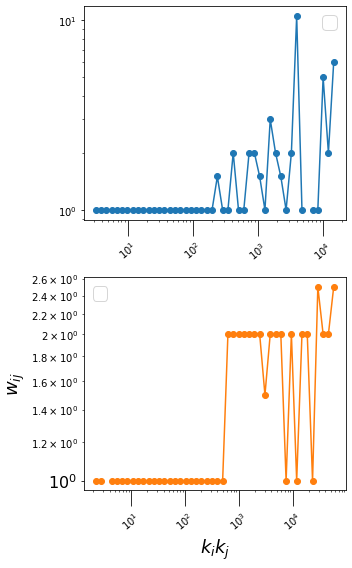

In [12]:
# 
fig, axs = plt.subplots(2,1,figsize=(5,8))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_kikj, tmp_wwww = [], []
    for edge, vals in tmp_res["edgesStats"].items():
        tmp_kikj.append(vals["ki_kj"])
        tmp_wwww.append(vals["e_str"])
        
    tmp_wwww = np.array(tmp_wwww)
    tmp_kikj = np.array(tmp_kikj)
    
    bins = np.logspace(np.log10(tmp_kikj.min()),
                    np.log10(tmp_kikj.max()),50)
    
    ywww = np.array([np.median(tmp_wwww[
            np.logical_and(tmp_kikj>=bins[i], tmp_kikj<bins[i+1])])
                   for i in range(len(bins)-1)])
    
    bins = (bins[1:] + bins[:-1])/2.
    ax = axs[iii]
    ax.loglog(bins[1:], ywww[1:], "o-C%d"%iii)
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$k_ik_j$", size=18)
    plt.ylabel(r"$w_{ij}$", size=18)
    
plt.tight_layout()
#plt.savefig("heaps_%s.pdf" % figureNameSuffix, bbox_inches="tight")

In [13]:
resultsArra[0]["similarities"][0]

KeyError: 'similarities'

KeyError: 'similarities'

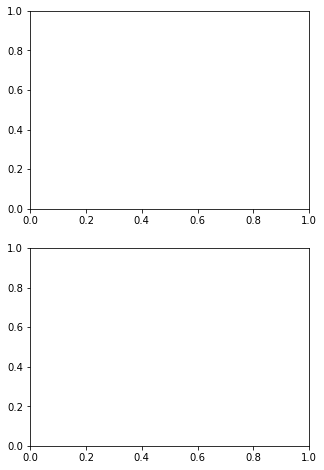

In [14]:
# 
fig, axs = plt.subplots(2,1,figsize=(5,8))

markers = "os^<>"
for iii, tmp_res in enumerate(resultsArra):
    tmp_sim = np.array(tmp_res["similarities"])
    
    bins = np.logspace(np.log10(tmp_sim.min()),
                    np.log10(tmp_sim.max()),50)
    
    ysim, bins = np.histogram(tmp_sim, bins=bins, density=True)
    
    bins = (bins[1:] + bins[:-1])/2.
    bins = bins[ysim > 0]
    ysim = ysim[ysim > 0]
    
    ax = axs[iii]
    ax.semilogx(bins, ysim, "o-C%d"%iii)
    
    ax.legend(loc="best", fontsize=18)
    ax.xaxis.set_tick_params(size=16, rotation=40)
    plt.yticks(size=16)

    plt.xlabel(r"$sim$", size=18)
    plt.ylabel(r"$P(sim)$", size=18)
    
plt.tight_layout()
#plt.savefig("heaps_%s.pdf" % figureNameSuffix, bbox_inches="tight")

## Plot all...

In [15]:
whatToCompare = ["TWT", "URNS_TWT", "APS", "URNS_APS", "MPC", "URNS_MPC"]

resultsArra = {selection:
                   pickle.load(gzip.open("collectiveResults_%s.pkl.gz"
                                     % selection, "rb"))
              for selection in whatToCompare}

In [63]:
def plotEdgeSimDistribution(ax, empirical, synthetic, color=0, label="***", xscale=1., yscale=1.):
    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_sim = np.array([e["sim"] for k, e in tmp_res["edgesStats"].items()])
    
        bins = np.logspace(np.log10(max(1e-18, tmp_sim.min())),
                        np.log10(tmp_sim.max()),50)

        ysim, bins = np.histogram(tmp_sim, bins=bins, density=True)

        bins = (bins[1:] + bins[:-1])/2.
        bins = bins[ysim > 0]
        ysim = ysim[ysim > 0]

        ax.loglog(bins*xscale, ysim*yscale,marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                lw=3.15, mec="C%d" % color, mew=2)
    
    plt.xticks(size=16)
    plt.yticks(size=16)

    plt.xlabel(r"$sim$", size=18)
    plt.ylabel(r"$P(sim)$ [a.u.]", size=18)

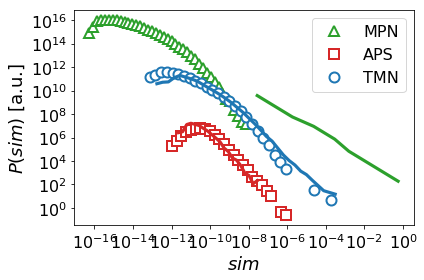

In [64]:
fig, ax = plt.subplots(1,1)

plotEdgeSimDistribution(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", yscale=1e+3)
plotEdgeSimDistribution(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", yscale=.001)
plotEdgeSimDistribution(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", yscale=10.)

plt.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("collective3_ALL.pdf", bbox_inches="tight")

In [70]:
def plotDegreeCorr(ax, empirical, synthetic, color=0, label="***", xscale=1., yscale=1., which="knn"):
    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):
        tmp_kkk = np.array(tmp_res["nodeDegree"])
        tmp_ccc = np.array(tmp_res["nodeClust"])
        tmp_ccw = np.array(tmp_res["nodeWClust"])
        tmp_cww = np.array(tmp_res["nodeWWWClust"])
        tmp_knn = np.array(tmp_res["nodeNNdeg"])
        tmp_knw = np.array(tmp_res["nodeNWdeg"])

        bins = np.logspace(np.log10(tmp_kkk.min()),
                        np.log10(tmp_kkk.max()),30)

        yknn = np.array([np.median(tmp_knn[
                np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                       for i in range(len(bins)-1)])
        yknw = np.array([np.median(tmp_knw[
                np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                       for i in range(len(bins)-1)])
        
        yccc = np.array([np.median(tmp_ccc[
                np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                       for i in range(len(bins)-1)])
        yccw = np.array([np.median(tmp_ccw[
                np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                       for i in range(len(bins)-1)])
        ycww = np.array([np.median(tmp_cww[
                np.logical_and(tmp_kkk>=bins[i], tmp_kkk<bins[i+1])])
                       for i in range(len(bins)-1)])

        bins = (bins[1:] + bins[:-1])/2.
        if which == "knn":
            ref = yknn
            ylab = r"$k_{nn}(k)$"
        elif which == "knw":
            ref = yknw
            ylab = r"$k_{nn}^w(k)$"
        elif which == "ccc":
            ref = yccc
            ylab = r"$C(k)$"
        elif which == "ccw":
            ref = yccw
            ylab = r"$C^w(k)$"
        elif which == "cww":
            ref = ycww
            ylab = r"$C^w(k)$"
        else:
            raise RuntimeError("Unkown which %s!" % which)
        
        XXXs, YYYs = bins[ref>0]*xscale, ref[ref>0]*yscale,
        
        ax.loglog(XXXs, YYYs,
                        marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                        ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                        lw=2.5, mec="C%d" % color, mew=2)

    ax.xaxis.set_tick_params(labelsize=16, rotation=40)
    ax.yaxis.set_tick_params(labelsize=16)

    ax.set_xlabel(r"$k$", size=18)
    ax.set_ylabel(ylab, size=18)


/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in greater


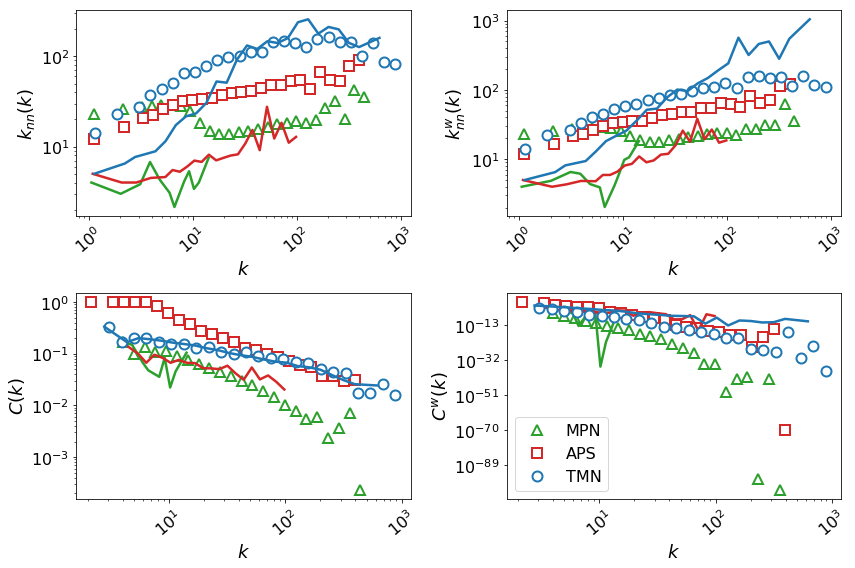

In [73]:
nRows, nCols = 2, 2
fig, axs = plt.subplots(nRows, nCols, figsize=(6*nRows,4*nCols))

for axi, which in enumerate(["knn", "knw", "ccc", "ccw"]):
    ax = axs[axi//nCols][axi%nCols]

    plotDegreeCorr(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", yscale=1., which=which)
    plotDegreeCorr(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", yscale=1., which=which)
    plotDegreeCorr(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", yscale=1., which=which)

ax.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("collective1_ALL.pdf", bbox_inches="tight")

In [79]:
def plotWvsKiKj(ax, empirical, synthetic, color=0, label="***", xscale=1., yscale=1.):
    markers = "o<^s>"
    for iii, tmp_res in enumerate([empirical, synthetic]):

        tmp_kikj, tmp_wwww = [], []
        for edge, vals in tmp_res["edgesStats"].items():
            tmp_kikj.append(vals["ki_kj"])
            tmp_wwww.append(vals["e_str"])

        tmp_wwww = np.array(tmp_wwww)
        tmp_kikj = np.array(tmp_kikj)

        bins = np.logspace(np.log10(tmp_kikj.min()),
                        np.log10(tmp_kikj.max()),50)

        ywww = np.array([np.median(tmp_wwww[
                np.logical_and(tmp_kikj>=bins[i], tmp_kikj<bins[i+1])])
                       for i in range(len(bins)-1)])

        bins = (bins[1:] + bins[:-1])/2.
        ax.loglog(bins[ywww>0], ywww[ywww>0]*yscale,
                    marker=markers[color%len(markers)] if iii==0 else "", linestyle="-" if iii==1 else "",
                    ms=10, c="w" if iii==0 else "C%d" % color, label=label if iii==0 else "",
                    lw=2.5, mec="C%d" % color, mew=2)

        ax.legend(loc="best", fontsize=18)
        ax.xaxis.set_tick_params(labelsize=16, rotation=40)
        ax.yaxis.set_tick_params(labelsize=16)

    ax.set_xlabel(r"$k_ik_j$", size=18)
    ax.set_ylabel(r"$w_{ij}$ [a.u.]", size=18)

/usr/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in greater


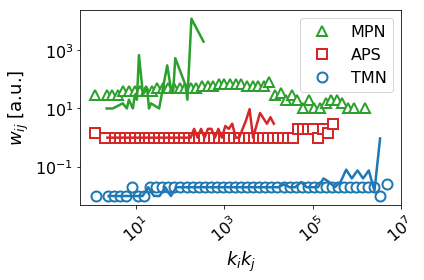

In [85]:
fig, ax = plt.subplots(1, 1)

plotWvsKiKj(ax, resultsArra["MPC"], resultsArra["URNS_MPC"], color=2, label="MPN", yscale=10.)
plotWvsKiKj(ax, resultsArra["APS"], resultsArra["URNS_APS"], color=3, label="APS", yscale=1.)
plotWvsKiKj(ax, resultsArra["TWT"], resultsArra["URNS_TWT"], color=0, label="TMN", yscale=.01)

ax.legend(fontsize=16, loc="best", ncol=1)#, bbox_to_anchor=[-.05, 1.25])
plt.tight_layout()
plt.savefig("collective2_ALL.pdf", bbox_inches="tight")